In [ ]:
EDA para el problema de predecir si una persona morir a causa de una falla en el corazon.

Analizaremos el dataset proporcionado en el siguiente link: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

1. Importamos las librerias necesarias:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                     #visualization
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

2. Una vez que descargamos el dataset en un archivo .csv del link proporcionado, cargamos mediante la libreria de panda.

In [4]:
data = pd.read_csv("dataset.csv")

3. Ahora necesitamos conocer los datos

In [5]:
data.shape

(299, 13)

a. Como vemos al correr la funcion de shape, el dataset contiene 299 records y 13 features o columnas de informacion.

In [6]:
data.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1


b. Para iniciar a visualizar los datos que se nos da, usamos la funcion head para dar una primera vista a los records y columnas que tenemos, y podemos ver que hay valores como los pertenecientes a la columna de age que nos estan dando un valor flotante cuando lo necesitamos como entero. Y aqui da pie a revisar cada una de las columnas para detectar los tipos de datos y si existiera un error, modificarlos para beneficio de nuestra solucion.

In [7]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

c. Vamos a transformar las columnas age de float64 a integer.

In [8]:
data["age"] = data["age"].astype(np.int64)

d. Confirmamos que el tipo de dato cambio

In [9]:
data.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

e. Otra columna que nos conviene cambiar es la columna de DEATH_EVENT, ya que la trataremos como una variable categorica

In [10]:
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype(object)

f. Confirmamos que el tipo de columna ahora es object.

In [11]:
data.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                  object
dtype: object

g. Ahora usaremos la funcion describe para tener unas estadisticas basicas de los datos

In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


4. Necesitamos limpiar los datos para eliminar cualquier posible valor null

In [13]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

a. Como vemos en los datos, no hemos encontrado ningun valor como null, lo cual nos dice que el dataset esta bien para usarse.

b. El siguiente paso seria encontrar possibles outliers es usar es una grafica de caja. ***En este paso solo vamos a usar 3 columnas para revisar si hay outliers, ya que por lo que se comenta en el problema hay 2 features ***

<Axes: xlabel='ejection_fraction'>

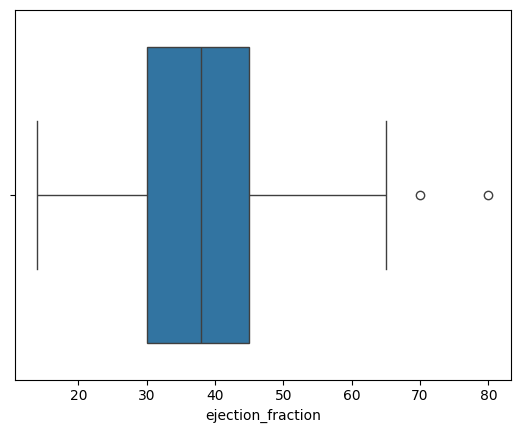

In [14]:
sns.boxplot(x=data['ejection_fraction'])

Tenemos 2 outliers en la columna de ejection_fraction. Lo recomendable seria eliminar estos 2.

<Axes: xlabel='serum_creatinine'>

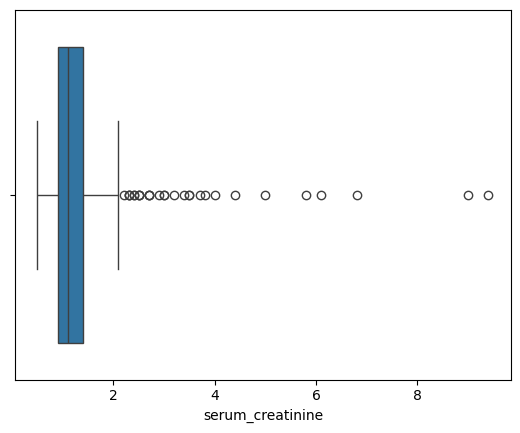

In [15]:
sns.boxplot(x=data['serum_creatinine'])

Demasiados outliers?

In [28]:
#Z-score method
from scipy import stats
z_scores_ef = stats.zscore(data['ejection_fraction'])
outliers = data['ejection_fraction'][(z_scores_ef > 3) | (z_scores_ef < -3)]

# Tukey's Fences
Q1 = np.percentile(data['ejection_fraction'], 25)
Q3 = np.percentile(data['ejection_fraction'], 75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = data['ejection_fraction'][(data['ejection_fraction'] < lower_fence) | (data['ejection_fraction'] > upper_fence)]
print(outliers)

z_scores_sc = stats.zscore(data['serum_creatinine'])
outliers_sc = data['serum_creatinine'][(z_scores_sc > 3) | (z_scores_sc < -3)]
# Tukey's Fences
Q1_sc = np.percentile(data['serum_creatinine'], 25)
Q3_sc = np.percentile(data['serum_creatinine'], 75)
IQR_sc = Q3_sc - Q1_sc

lower_fence_sc = Q1_sc - 1.5 * IQR_sc
upper_fence_sc = Q3_sc + 1.5 * IQR_sc

outliers_sc = data['serum_creatinine'][(data['serum_creatinine'] < lower_fence_sc) | (data['serum_creatinine'] > upper_fence_sc)]
print(outliers_sc)

64     80
217    70
Name: ejection_fraction, dtype: int64
4      2.7
9      9.4
10     4.0
28     5.8
31     3.0
35     3.5
38     2.3
39     3.0
48     4.4
52     6.8
54     2.2
56     2.7
61     2.3
65     2.9
82     2.5
104    2.3
117    3.2
124    3.7
129    3.4
131    6.1
150    2.5
167    2.4
183    2.5
203    3.5
217    9.0
228    5.0
247    2.4
281    2.7
282    3.8
Name: serum_creatinine, dtype: float64


Ahora debemos eliminar los outliers que encontramos en el dataset

In [49]:
dataCorrected = pd.read_csv("datasetCleaned.csv")

Creamos los box plots para revisar los datos

<Axes: xlabel='ejection_fraction'>

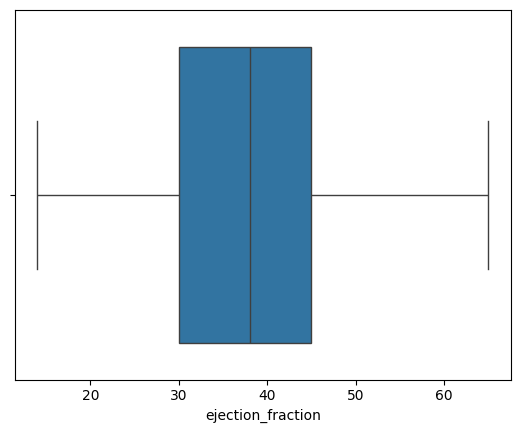

In [50]:
sns.boxplot(x=dataCorrected['ejection_fraction'])

<Axes: xlabel='serum_creatinine'>

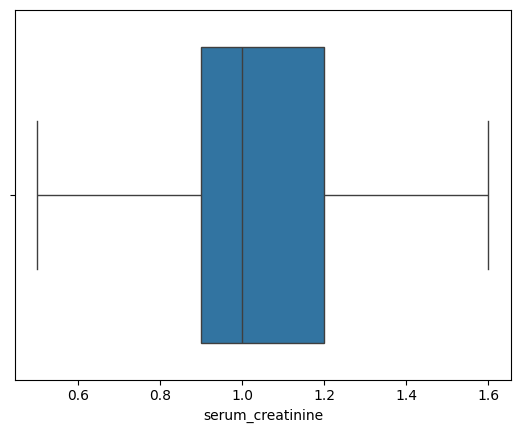

In [51]:
sns.boxplot(x=dataCorrected['serum_creatinine'])

In [52]:
#Z-score method
from scipy import stats
z_scores_ef = stats.zscore(dataCorrected['ejection_fraction'])
outliers = dataCorrected['ejection_fraction'][(z_scores_ef > 3) | (z_scores_ef < -3)]

# Tukey's Fences
Q1 = np.percentile(dataCorrected['ejection_fraction'], 25)
Q3 = np.percentile(dataCorrected['ejection_fraction'], 75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = dataCorrected['ejection_fraction'][(dataCorrected['ejection_fraction'] < lower_fence) | (dataCorrected['ejection_fraction'] > upper_fence)]
print(outliers)

z_scores_sc = stats.zscore(dataCorrected['serum_creatinine'])
outliers_sc = dataCorrected['serum_creatinine'][(z_scores_sc > 3) | (z_scores_sc < -3)]
# Tukey's Fences
Q1_sc = np.percentile(dataCorrected['serum_creatinine'], 25)
Q3_sc = np.percentile(dataCorrected['serum_creatinine'], 75)
IQR_sc = Q3_sc - Q1_sc

lower_fence_sc = Q1_sc - 1.5 * IQR_sc
upper_fence_sc = Q3_sc + 1.5 * IQR_sc

outliers_sc = dataCorrected['serum_creatinine'][(dataCorrected['serum_creatinine'] < lower_fence_sc) | (dataCorrected['serum_creatinine'] > upper_fence_sc)]
print(outliers_sc)

Series([], Name: serum_creatinine, dtype: float64)


Ahora que ya eliminamos los outliers y visualizamos los datos, continuaremos con la correlacion

In [53]:
corr_matrix = dataCorrected.corr()
print(corr_matrix)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.086036                 -0.065610   
anaemia                   0.086036  1.000000                 -0.195111   
creatinine_phosphokinase -0.065610 -0.195111                  1.000000   
diabetes                 -0.053672  0.004130                 -0.063924   
ejection_fraction         0.130331  0.017903                 -0.089703   
high_blood_pressure       0.071190  0.032154                 -0.064947   
platelets                -0.146723 -0.071531                  0.011203   
serum_creatinine          0.137557  0.011923                 -0.050069   
serum_sodium             -0.012112  0.054856                  0.012437   
sex                       0.028058 -0.144679                  0.106192   
smoking                   0.037197 -0.145744                  0.007793   
time                     -0.172566 -0.121871                 -0.020331   
DEATH_EVENT               0.191266  0.

Head Maps

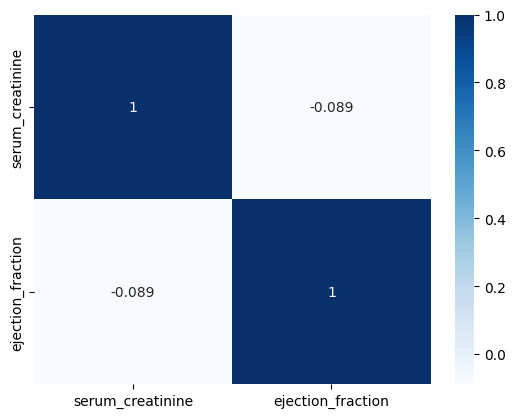

In [54]:
sns.heatmap(dataCorrected[['serum_creatinine','ejection_fraction']].corr(), annot=True, cmap = 'Blues')
plt.show()

Visualizacion

In [ ]:
hist = sns.histplot(dataCorrected = )

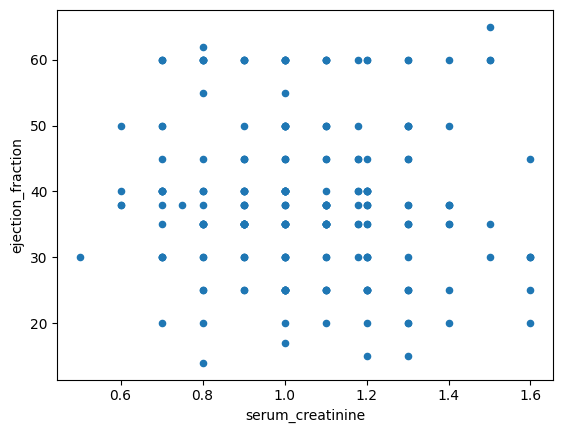

In [55]:
dataCorrected.plot.scatter(x="serum_creatinine",y="ejection_fraction")
plt.show()

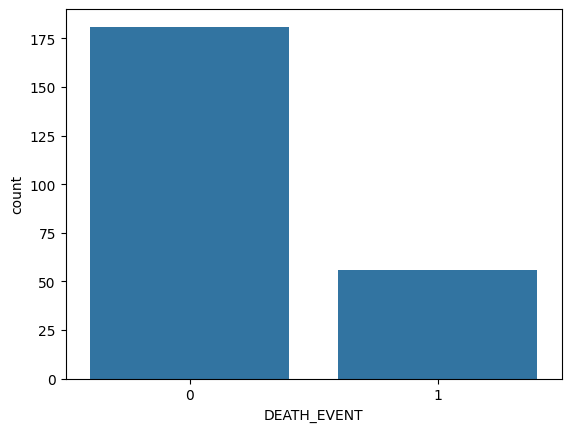

In [56]:
sns.countplot(dataCorrected, x="DEATH_EVENT");